<a href="https://colab.research.google.com/github/suadamohammed/NLP/blob/main/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
cd '/content/drive/MyDrive/workshops/NLP Basics'

/content/drive/MyDrive/workshops/NLP Basics


In [9]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head()

,Category,Message
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,1,FreeMsg Hey there darling it's been 3 week's n...
2,1,WINNER!! As a valued network customer you have...
3,1,Had your mobile 11 months or more? U R entitle...
4,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1499 non-null   int64 
 1   Message   1499 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.5+ KB


In [11]:
data.Category.value_counts() 

0    752
1    747
Name: Category, dtype: int64

          Message
Category         
0             752
1             747
[0 1]
Category
0    752
1    747
Name: Message, dtype: int64


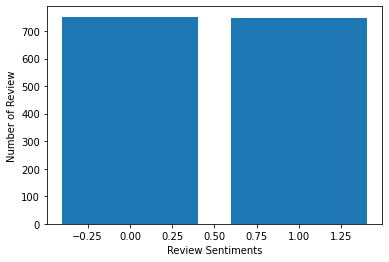

In [12]:

import matplotlib.pyplot as plt
Sentiment_count=data.groupby('Category').count()
print(Sentiment_count)
print(Sentiment_count.index.values)
print(Sentiment_count['Message'])
plt.bar(Sentiment_count.index.values, Sentiment_count['Message'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Message'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
print(text_counts)

  (0, 1865)	1
  (0, 1691)	2
  (0, 377)	1
  (0, 4240)	1
  (0, 1351)	1
  (0, 4218)	1
  (0, 1741)	2
  (0, 1447)	1
  (0, 1803)	1
  (0, 3877)	1
  (0, 392)	1
  (0, 383)	1
  (0, 3816)	1
  (0, 696)	1
  (0, 3205)	1
  (0, 3149)	1
  (0, 3641)	1
  (0, 3975)	1
  (0, 3174)	1
  (0, 3763)	1
  (0, 1181)	1
  (0, 3337)	2
  (0, 890)	1
  (0, 77)	1
  (1, 3641)	1
  :	:
  (1493, 757)	1
  (1494, 3337)	1
  (1494, 2439)	1
  (1494, 3993)	1
  (1494, 1751)	1
  (1494, 1632)	2
  (1494, 1458)	1
  (1494, 3463)	1
  (1494, 822)	1
  (1494, 4296)	1
  (1494, 2419)	1
  (1494, 3154)	1
  (1494, 3341)	1
  (1495, 4006)	1
  (1495, 1750)	1
  (1496, 3865)	1
  (1496, 4212)	1
  (1496, 1713)	1
  (1496, 2354)	1
  (1496, 2735)	1
  (1497, 918)	1
  (1497, 3102)	1
  (1498, 2007)	1
  (1498, 3102)	1
  (1498, 3845)	1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Category'], test_size=0.3, random_state=1)

In [16]:
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Support Vector Machine
clf = SVC(kernel = 'linear',C=0.8).fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9555555555555556


In [17]:
print("Accuracy:",metrics.classification_report(y_test, predicted))

Accuracy:               precision    recall  f1-score   support

           0       0.92      0.99      0.96       220
           1       0.99      0.92      0.95       230

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [18]:
print("Accuracy:\n",metrics.confusion_matrix(y_test, predicted))

Accuracy:
 [[218   2]
 [ 18 212]]
